In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv(r'C:\Users\sandeep\Desktop\kajal\used_cars.csv')

In [3]:
car.head()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
0,New Delhi,2012,Maruti,Ertiga VXI,Manual,"37,786 km",Petrol,1st Owner,"₹4,15,000"
1,New Delhi,2014,Ford,Ecosport 1.5 TREND TDCI,Manual,"47,562 km",Diesel,2nd Owner,"₹3,99,142"
2,New Delhi,2015,Honda,Mobilio 1.5 S I DTEC,Manual,"52,945 km",Diesel,1st Owner,"₹4,55,000"
3,New Delhi,2019,Toyota,Innova Crysta 2.4 VX 7 STR,Manual,"31,235 km",Diesel,1st Owner,"₹18,00,000"
4,New Delhi,2019,Maruti,Ertiga ZDI PLUS,Manual,"30,079 km",Diesel,1st Owner,"₹10,00,000"


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14975 entries, 0 to 14974
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LOCATION     14975 non-null  object
 1   MNF_YEAR     14975 non-null  int64 
 2   BRAND        14975 non-null  object
 3   MODEL        14975 non-null  object
 4   VARIANT      14248 non-null  object
 5   DRIVEN_KM    14975 non-null  object
 6   FUELTYPE     14975 non-null  object
 7   NOOF_OWNERS  14975 non-null  object
 8   PRICE        14975 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [5]:
car.describe()

,MNF_YEAR
count,14975.000000
mean,2014.577563
std,2.823319
min,2007.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2021.000000


# EDA

In [6]:
car.columns

Index(['LOCATION', 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'DRIVEN_KM',
       'FUELTYPE', 'NOOF_OWNERS', 'PRICE'],
      dtype='object')

In [7]:
car.LOCATION.unique()

array(['New Delhi', 'Noida', 'Gurgaon', 'Mumbai', 'Pune', 'Bengaluru',
       'Hyderabad', 'Chennai', 'Kolkata', 'Ahmedabad'], dtype=object)

In [8]:
car.BRAND.unique()

array(['Maruti', 'Ford', 'Honda', 'Toyota', 'Mahindra', 'Renault', 'Tata',
       'Hyundai', 'Nissan', 'Mitsubishi', 'Ssangyong', 'Landrover',
       'Mercedes', 'Audi', 'BMW', 'Jeep', 'ISUZU', 'Volkswagen', 'Skoda',
       'Fiat', 'Chevrolet', 'Datsun', 'Jaguar'], dtype=object)

In [9]:
car.VARIANT.unique()

array(['Manual', 'Automatic', nan], dtype=object)

In [10]:
car.duplicated().sum()

6667

In [11]:
car.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        727
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

In [12]:
car=car.drop_duplicates()

In [13]:
car.isnull().sum()

LOCATION         0
MNF_YEAR         0
BRAND            0
MODEL            0
VARIANT        359
DRIVEN_KM        0
FUELTYPE         0
NOOF_OWNERS      0
PRICE            0
dtype: int64

In [14]:
car['VARIANT']=car['VARIANT'].fillna('NOT MENTIONED')

In [15]:
car['VARIANT'] = car['VARIANT'].fillna('NOT MENTIONED')

In [16]:
cars=car.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()
catagorical_data = ['LOCATION' , 'MNF_YEAR', 'BRAND', 'MODEL', 'VARIANT', 'FUELTYPE' , 'NOOF_OWNERS' ]

for i in catagorical_data:
    cars[i]=cars[i].astype('str')
    cars[i]=LE.fit_transform(cars[i])

In [18]:
cars['PRICE'] = cars['PRICE'].str.replace(r'\D', '').astype(int)
cars['DRIVEN_KM'] = cars['DRIVEN_KM'].str.replace(r'\D', '').astype(int)

C:\Users\sandeep\AppData\Local\Temp\ipykernel_7796\1694289241.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cars['PRICE'] = cars['PRICE'].str.replace(r'\D', '').astype(int)
C:\Users\sandeep\AppData\Local\Temp\ipykernel_7796\1694289241.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cars['DRIVEN_KM'] = cars['DRIVEN_KM'].str.replace(r'\D', '').astype(int)


In [19]:
cars.describe()

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS,PRICE
count,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8308.000000,8.308000e+03
mean,5.484352,7.540804,11.785267,452.045378,0.932715,64489.278888,1.209798,0.284906,5.330477e+05
std,2.699218,2.853874,4.831691,270.636115,0.386262,41049.281410,1.038869,0.531949,3.327538e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,179.000000,0.000000,0.000000,9.916200e+04
25%,3.000000,5.000000,7.000000,220.000000,1.000000,33567.250000,0.000000,0.000000,3.210990e+05
50%,6.000000,8.000000,13.000000,445.000000,1.000000,58494.000000,2.000000,0.000000,4.369490e+05
75%,8.000000,10.000000,13.000000,682.000000,1.000000,87027.000000,2.000000,0.000000,6.437990e+05
max,9.000000,14.000000,22.000000,880.000000,2.000000,312882.000000,4.000000,4.000000,4.100000e+06


In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8308 entries, 0 to 14974
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LOCATION     8308 non-null   int32
 1   MNF_YEAR     8308 non-null   int32
 2   BRAND        8308 non-null   int32
 3   MODEL        8308 non-null   int32
 4   VARIANT      8308 non-null   int32
 5   DRIVEN_KM    8308 non-null   int32
 6   FUELTYPE     8308 non-null   int32
 7   NOOF_OWNERS  8308 non-null   int32
 8   PRICE        8308 non-null   int32
dtypes: int32(9)
memory usage: 357.0 KB


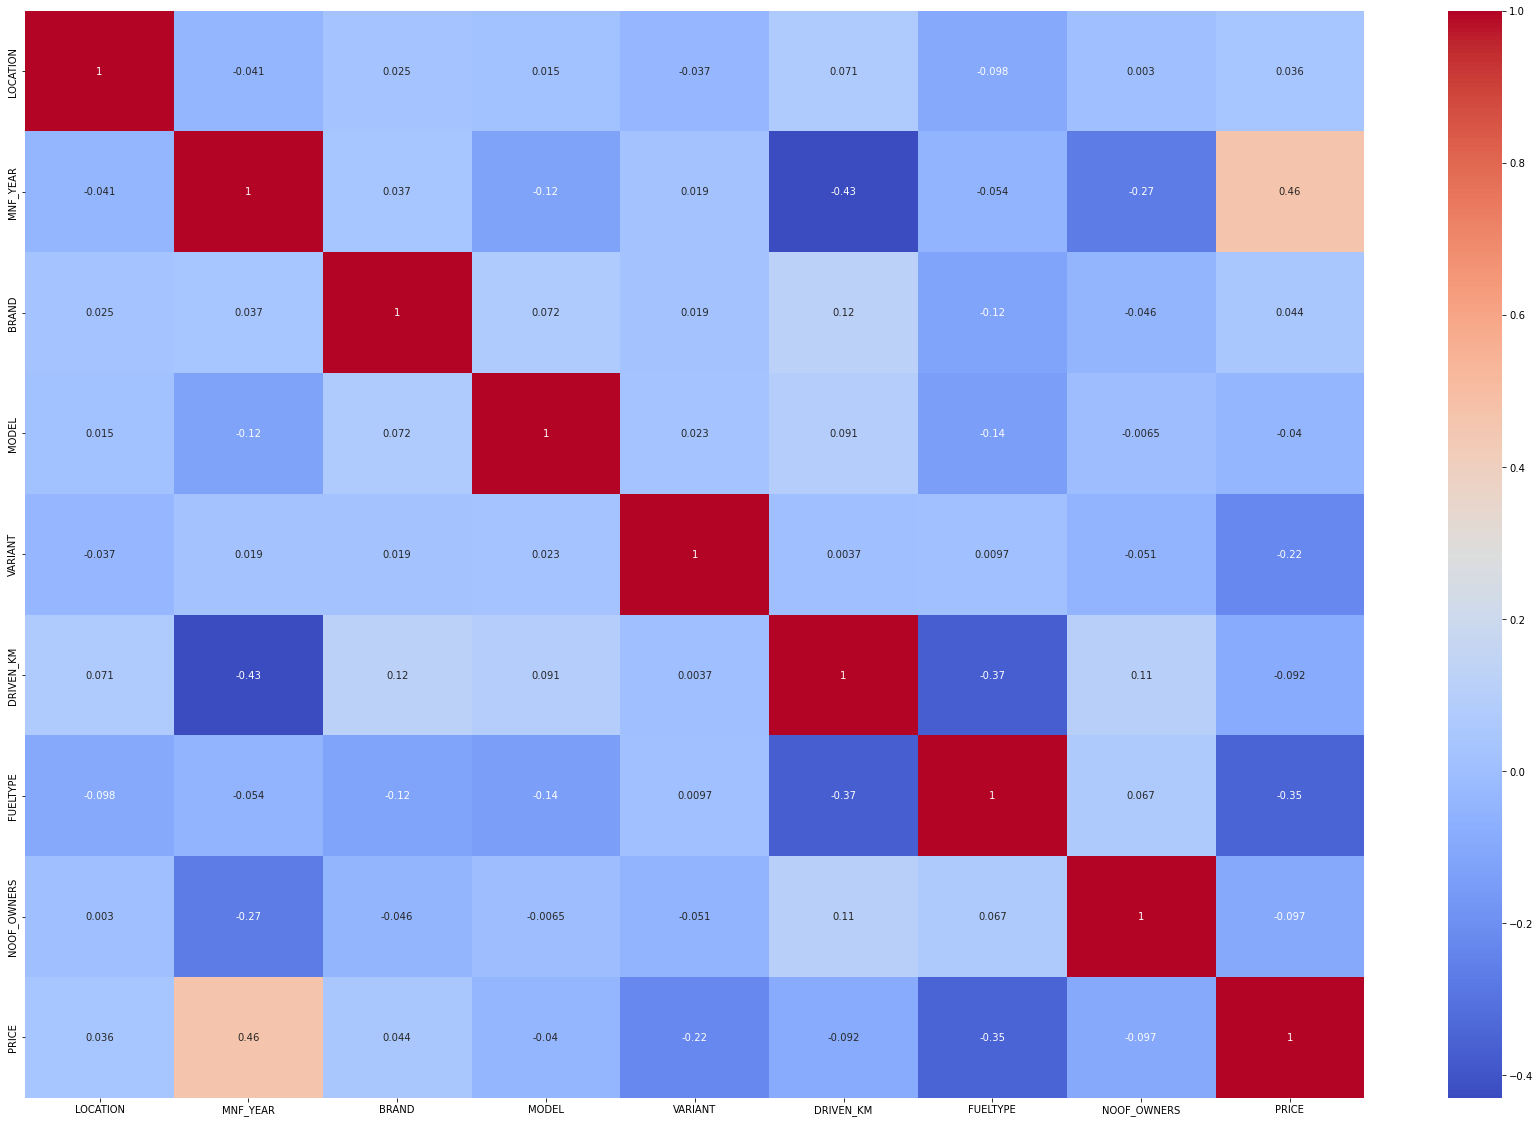

In [21]:

plt.figure(figsize=(30,20))
sns.heatmap(cars.corr(), annot = True, cmap= "coolwarm")
plt.show()

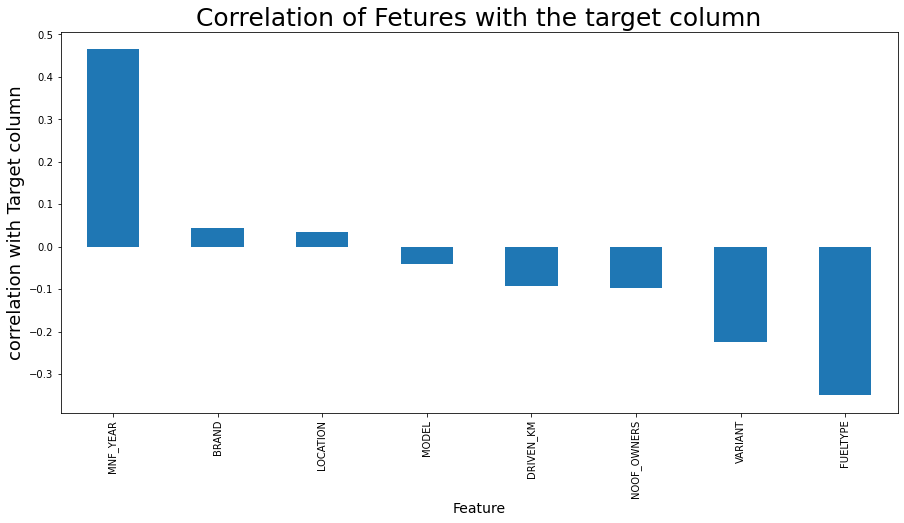

KEY OBSERVATIONS:
 


,PRICE
MNF_YEAR,0.464843
BRAND,0.044029
LOCATION,0.035546
MODEL,-0.039954
DRIVEN_KM,-0.092270
NOOF_OWNERS,-0.097283
VARIANT,-0.223530
FUELTYPE,-0.349668


In [22]:
plt.figure(figsize=(15,7))
cars.corr()["PRICE"].sort_values(ascending=False).drop(["PRICE"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()
cor=pd.DataFrame(cars.corr()["PRICE"].sort_values(ascending=False)).drop(["PRICE"])
print("KEY OBSERVATIONS:\n ")
cor

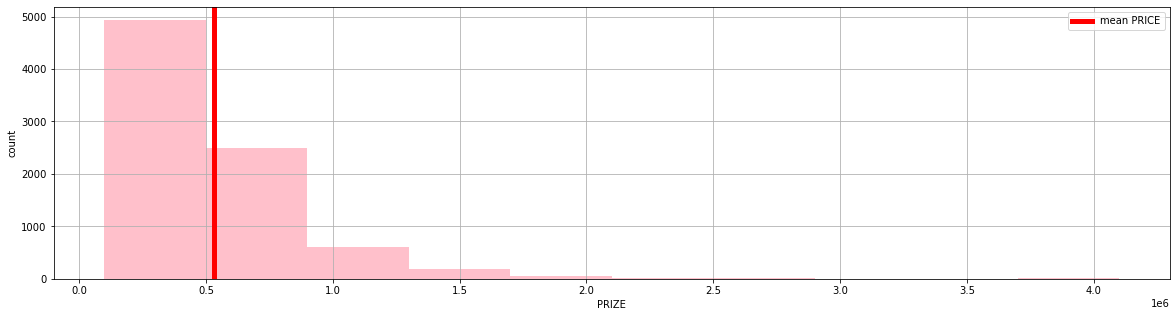

MATHEMATICAL SUMMARY OF PRIZE :
 count    8.308000e+03
mean     5.330477e+05
std      3.327538e+05
min      9.916200e+04
25%      3.210990e+05
50%      4.369490e+05
75%      6.437990e+05
max      4.100000e+06
Name: PRICE, dtype: float64


In [23]:
cars.PRICE.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(cars.PRICE), linewidth = 5, color = "red", label = "mean PRICE")
plt.xlabel("PRIZE")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      cars.PRICE.describe())

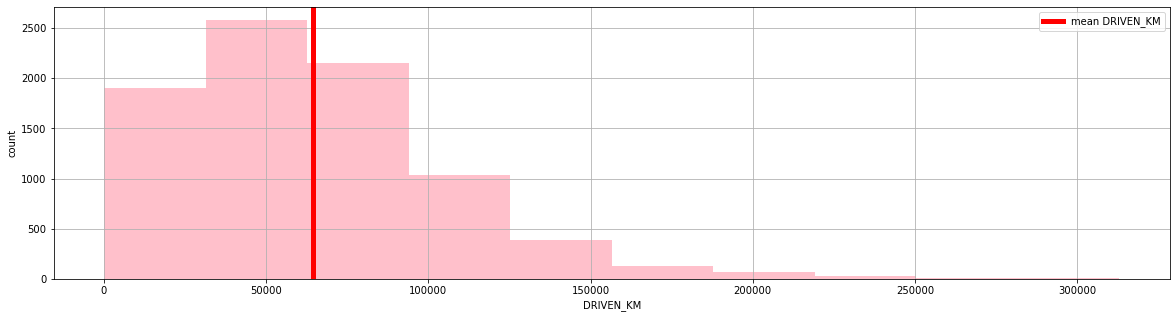

MATHEMATICAL SUMMARY OF PRIZE :
 count      8308.000000
mean      64489.278888
std       41049.281410
min         179.000000
25%       33567.250000
50%       58494.000000
75%       87027.000000
max      312882.000000
Name: DRIVEN_KM, dtype: float64


In [24]:
cars.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(cars.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      cars.DRIVEN_KM.describe())


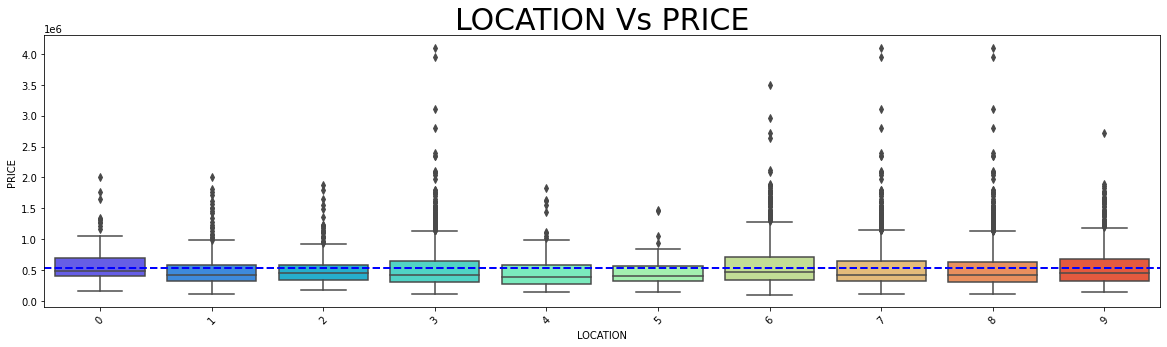

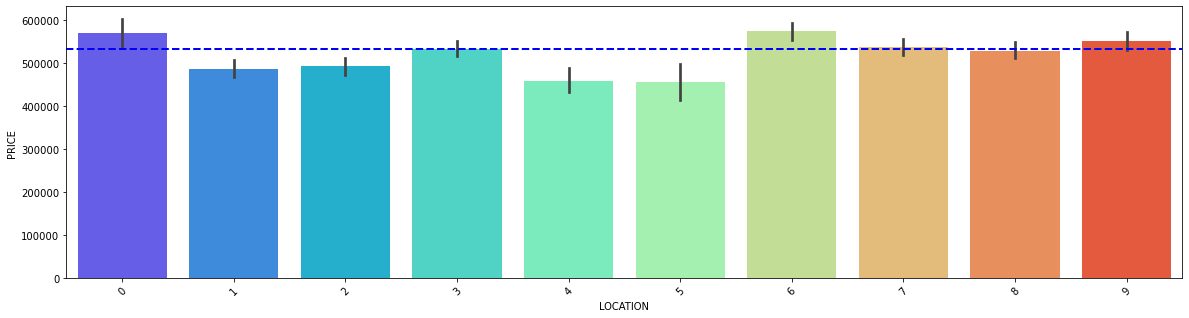

In [25]:
cars1 = cars.copy()
cars1['PRICE'] = cars1['PRICE']
cars1['DRIVEN_KM'] = cars1['DRIVEN_KM']
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

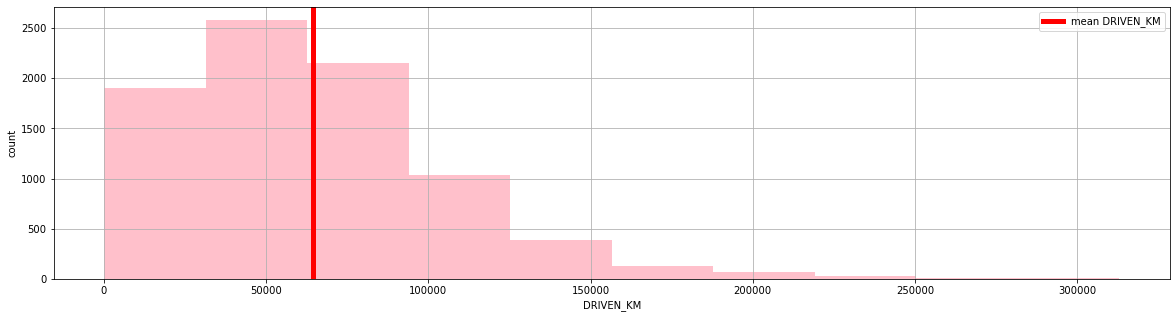

MATHEMATICAL SUMMARY OF PRIZE :
 count      8308.000000
mean      64489.278888
std       41049.281410
min         179.000000
25%       33567.250000
50%       58494.000000
75%       87027.000000
max      312882.000000
Name: DRIVEN_KM, dtype: float64


In [26]:
cars.DRIVEN_KM.hist(bins =10,figsize=(20,5), color ="pink")
plt.axvline(np.mean(cars.DRIVEN_KM), linewidth = 5, color = "red", label = "mean DRIVEN_KM")
plt.xlabel("DRIVEN_KM")
plt.ylabel("count")
plt.legend()
plt.show()
print("MATHEMATICAL SUMMARY OF PRIZE :\n",\
      cars.DRIVEN_KM.describe())


# Multivariate Analysis:

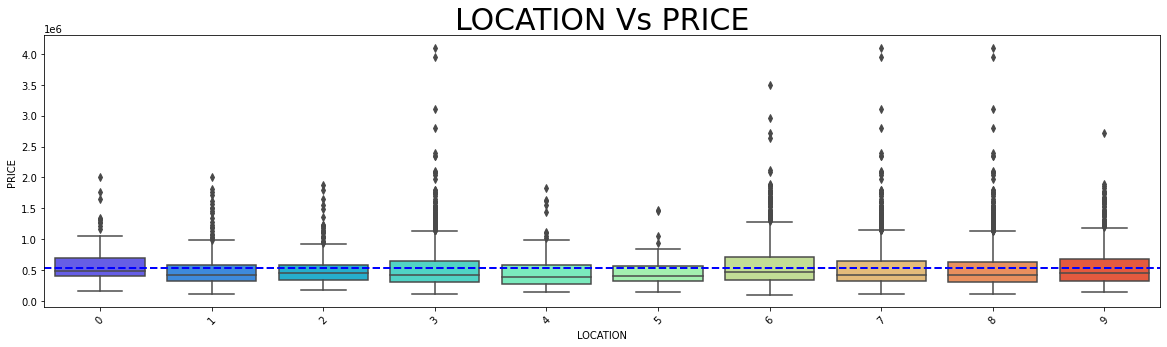

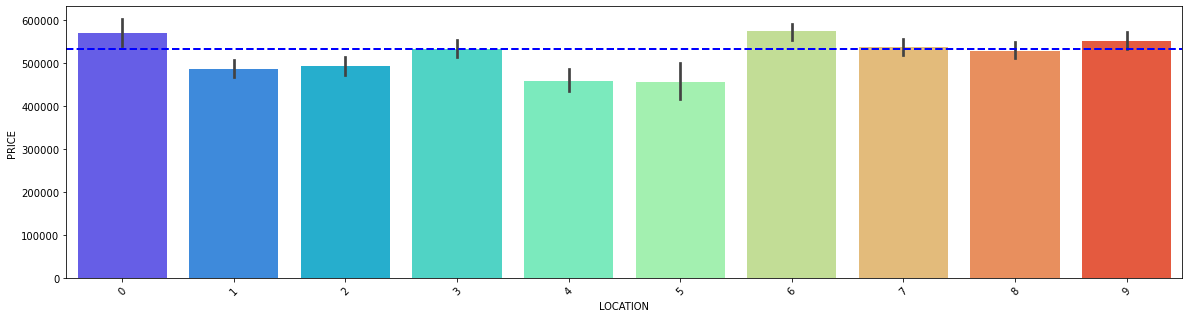

In [28]:
cars1 = cars.copy()

cars1['PRICE'] = cars1['PRICE']
cars1['DRIVEN_KM'] = cars1['DRIVEN_KM']

plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "LOCATION",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("LOCATION Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "LOCATION",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


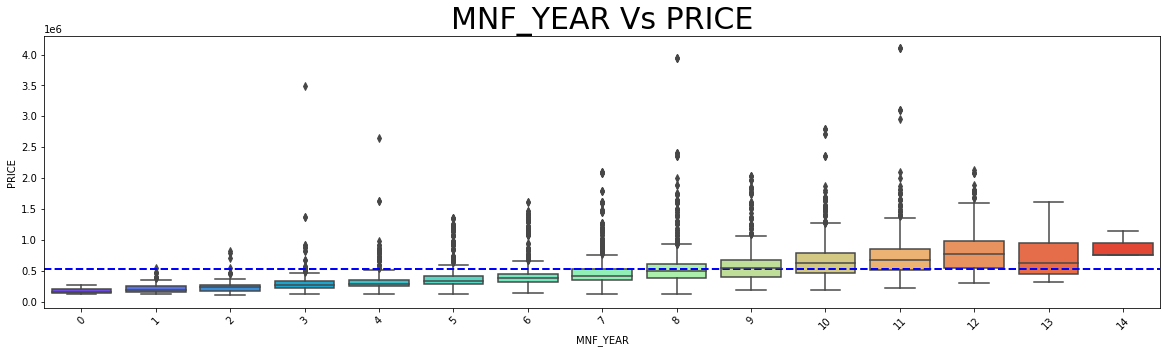

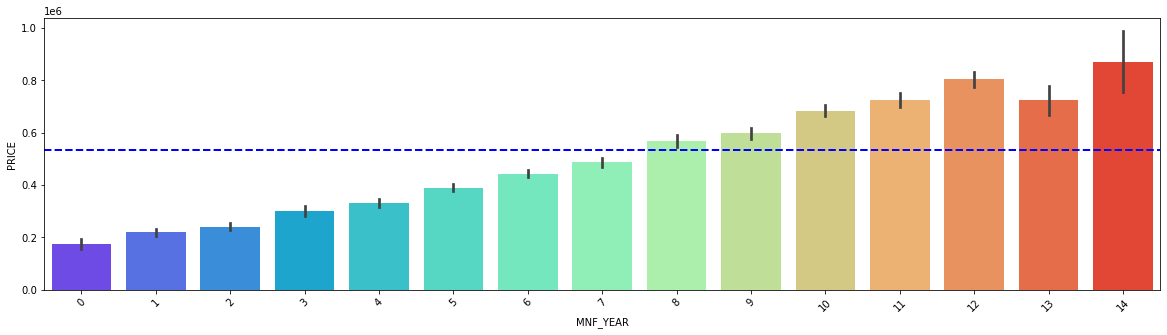

In [29]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "MNF_YEAR",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("MNF_YEAR Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "MNF_YEAR",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

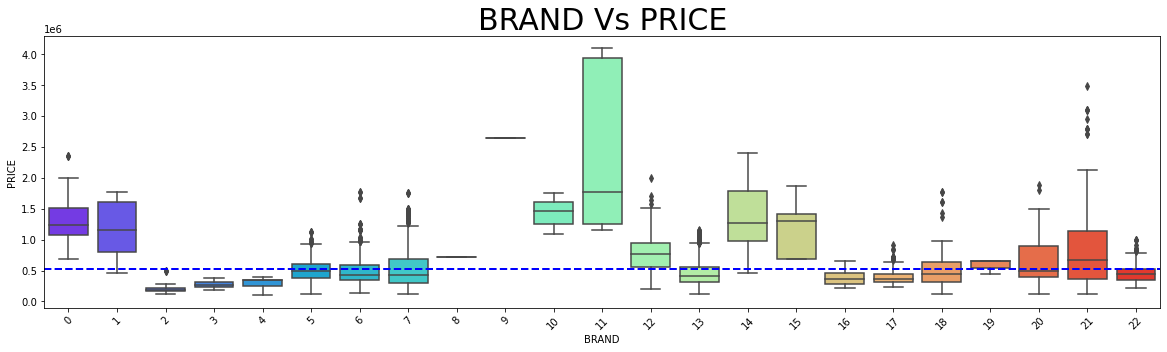

<function matplotlib.pyplot.show(close=None, block=None)>

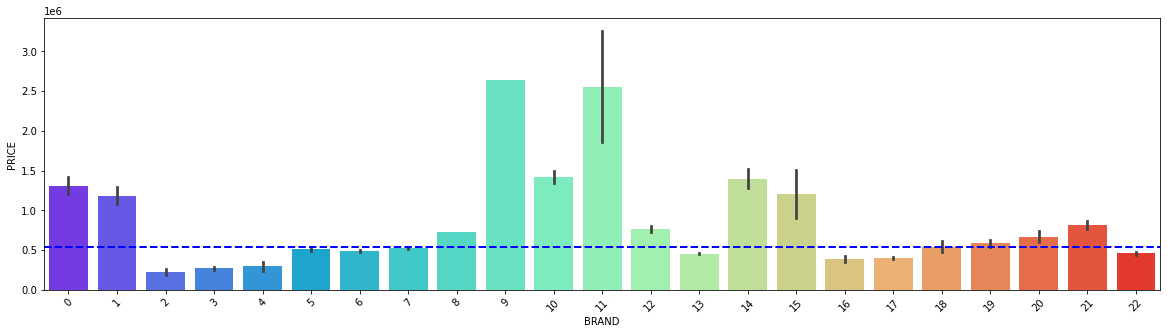

In [31]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "BRAND",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("BRAND Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "BRAND",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show

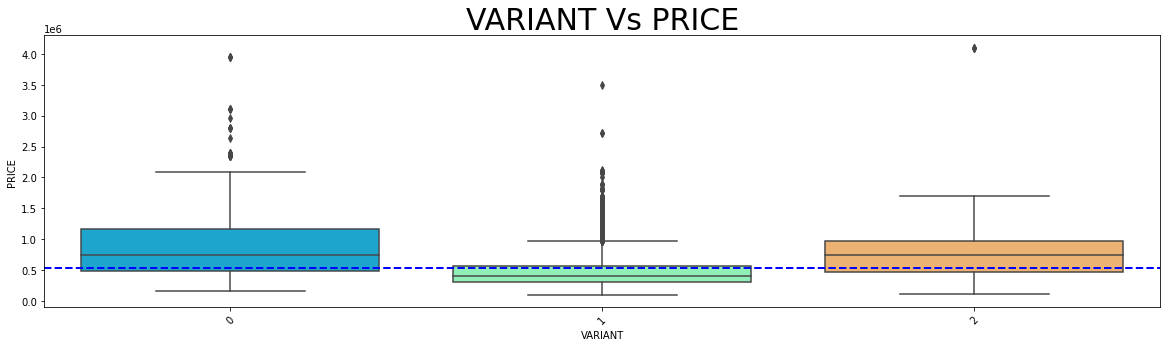

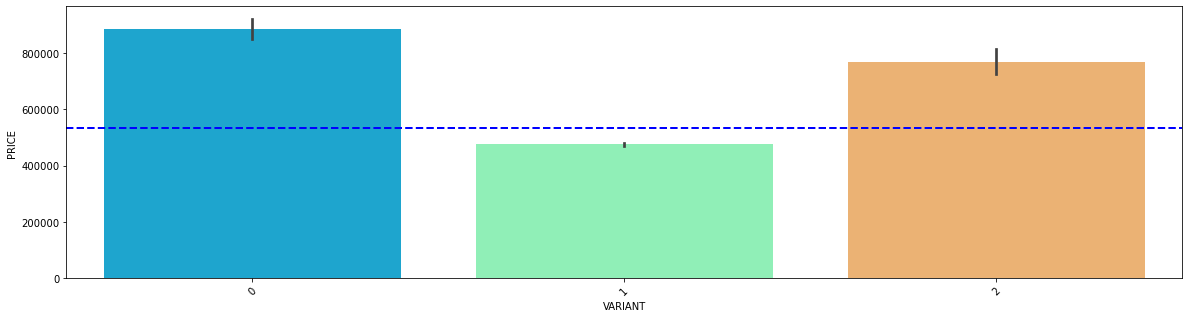

In [32]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "VARIANT",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("VARIANT Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "VARIANT",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

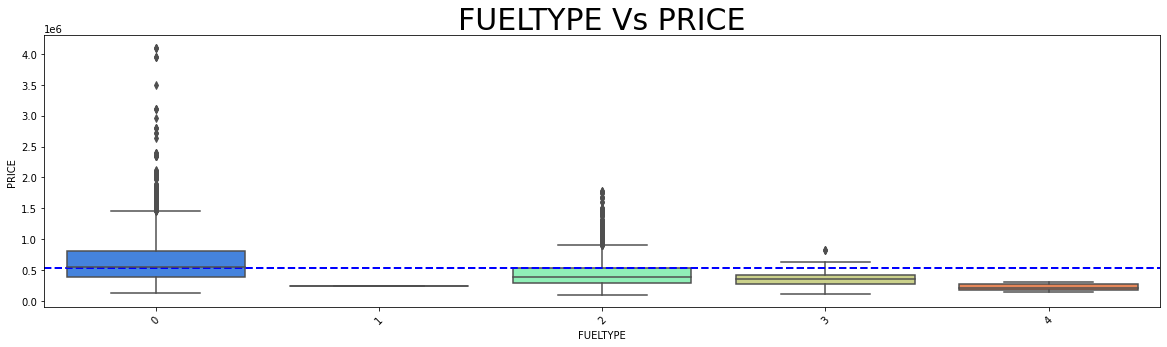

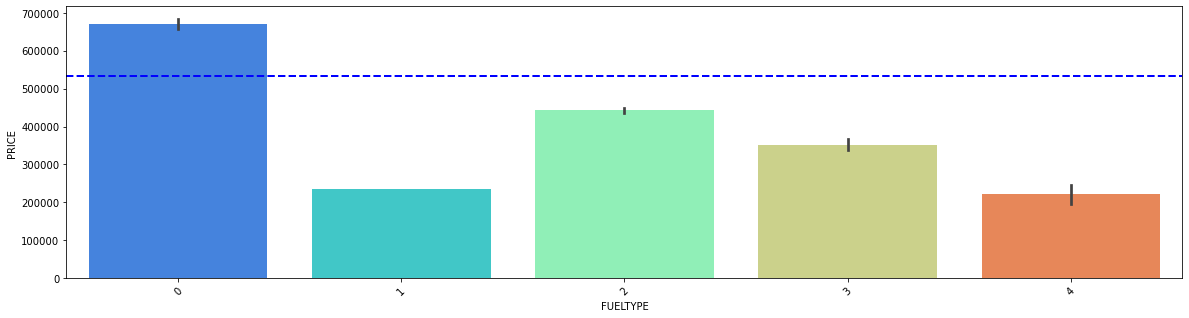

In [34]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "FUELTYPE",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("FUELTYPE Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "FUELTYPE",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()


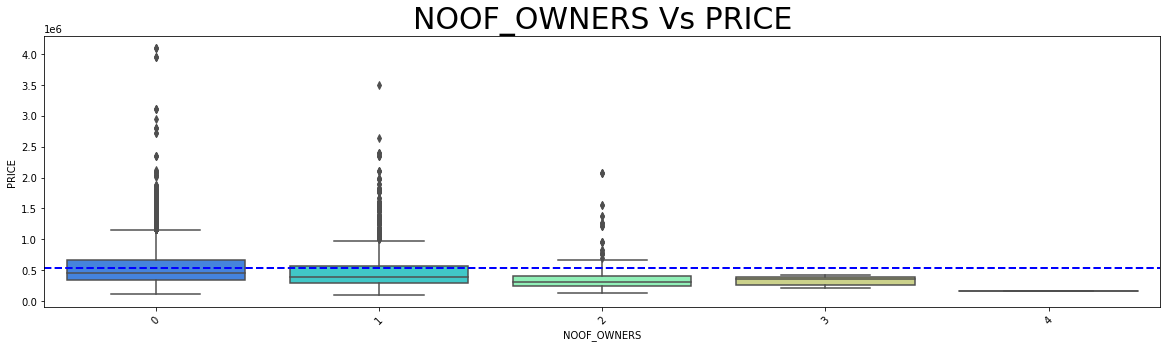

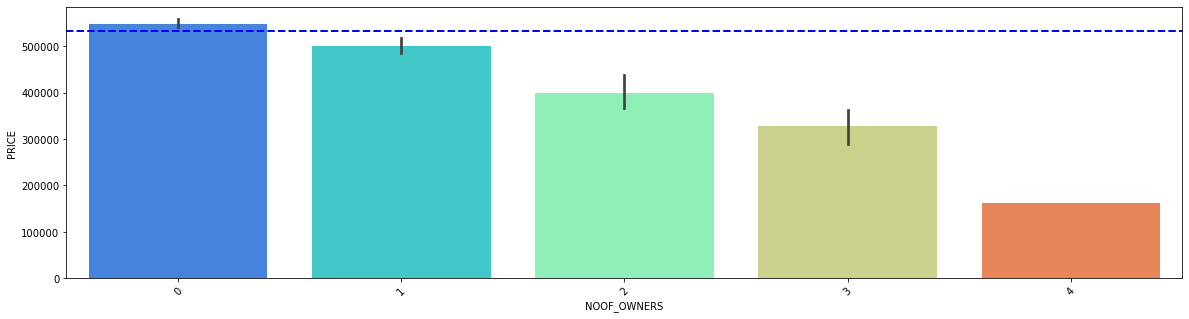

In [35]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.boxplot(x = "NOOF_OWNERS",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("NOOF_OWNERS Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x = "NOOF_OWNERS",y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.xticks(rotation=45)
plt.show()

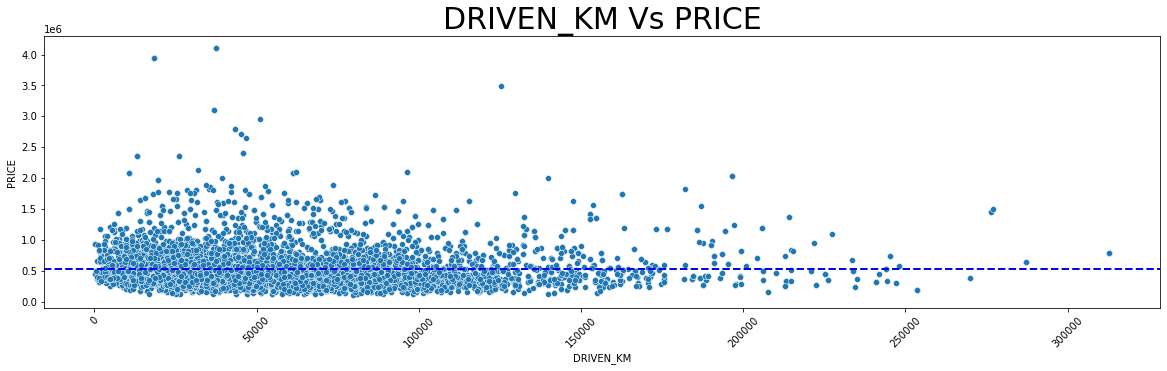

In [36]:
plt.figure(figsize=(20,5))
mean_cost = np.mean(cars.PRICE)
sns.scatterplot(x = 'DRIVEN_KM',y = "PRICE", data = cars1, palette = "rainbow")
plt.axhline(mean_cost, color = "b", linestyle="dashed", linewidth=2)
plt.title("DRIVEN_KM Vs PRICE", fontsize = 30)
plt.xticks(rotation=45)
plt.show()


# Data Pre-Processing.


# Lets observe the skewness and outliers in the Data.

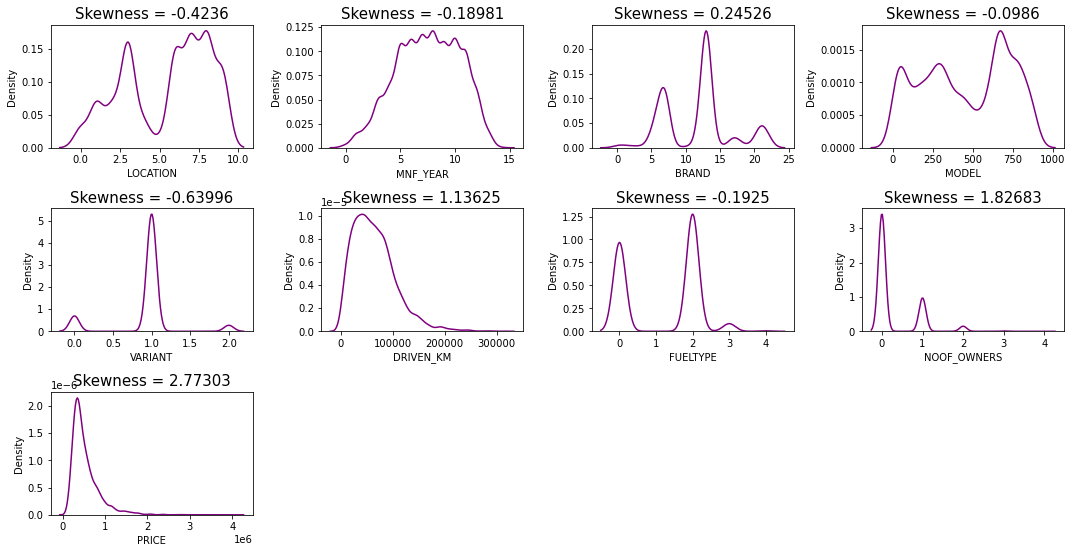

In [37]:
plt.figure(figsize=(15,15))
for i in range (0, len(cars.columns)):
    plt.subplot(6,4,i+1)         
    sns.kdeplot(cars[cars.columns[i]], color = "purple")
    plt.title(f"Skewness = {round(cars[cars.columns[i]].skew(),5)}",fontsize=15)
    plt.tight_layout()


In [38]:
from scipy.stats import zscore

z= np.abs(zscore(cars))
threshold= 3
cars_new = cars[(z < 3).all(axis=1)]
print(f"Orginal Data {cars.shape}\nAfter Removing outliers {cars_new.shape}\nThe percentage of data loss {((8308-7765)/8308)*100}%")

Orginal Data (8308, 9)
After Removing outliers (7765, 9)
The percentage of data loss 6.535869041887338%


In [39]:
x=cars.drop(["PRICE"], axis = 1)
y=cars.PRICE
x

,LOCATION,MNF_YEAR,BRAND,MODEL,VARIANT,DRIVEN_KM,FUELTYPE,NOOF_OWNERS
0,7,5,13,324,1,37786,2,0
1,7,7,5,276,1,47562,0,1
2,7,8,6,502,1,52945,0,0
3,7,12,21,444,1,31235,0,0
4,7,12,13,329,1,30079,0,0
...,...,...,...,...,...,...,...,...
14970,0,12,5,280,1,49191,0,0
14971,0,9,7,228,1,132350,0,1
14972,0,11,7,227,1,27656,2,0
14973,0,12,6,784,1,62086,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Model Building

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x,y,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train_1,y_train_1)
    y_pred_1 = mod.predict(x_test_1)
    tempacc = r2_score(y_test_1,y_pred_1)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")

Best Accuracy 43.17710556351927 found on randomstate 845


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .25, random_state = best_rstate)

In [44]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [45]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]

model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForest"]

In [46]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train,y_train)
    print("Score of", m, "is:", m.score(x_train,y_train))
    score.append(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test,predm))
    mean_abs_e.append(mean_absolute_error(y_test,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test,predm))
    mean_sqr_e.append(mean_squared_error(y_test,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test,predm)))
    print("R2 SCORE: ", r2_score(y_test,predm))
    r2.append(r2_score(y_test,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.3595491143701387

ERROR:
MEAN ABSOLUTE ERROR:  166956.39465409375
MEAN SQUARED ERROR:  59253176564.776344
ROOT MEAN SQUARED ERROR : 243419.75385078415
R2 SCORE:  0.4317710556351927
**********************************************************************************************************



Score of Lasso() is: 0.359549114292796

ERROR:
MEAN ABSOLUTE ERROR:  166955.8919531636
MEAN SQUARED ERROR:  59253158493.965034
ROOT MEAN SQUARED ERROR : 243419.71673216004
R2 SCORE:  0.43177122893152264
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.3595491047016057

ERROR:
MEAN ABSOLUTE ERROR:  166950.36335120036
MEAN SQUARED ERROR:  59253562829.02141
ROOT MEAN SQUARED ERROR : 243420.5472613629
R2 SCORE:  0.43176735141987554
**********************************************************************************************************



Score of ElasticNet() is:

In [47]:
mean_score=[]
STD=[]
for m in models:
    CV=cross_val_score(m,x,y,cv=5,scoring="r2")
    print("SCORE OF",m,"IS as follows...")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS as follows...
SCORE IS: [0.34409609 0.30402271 0.35713837 0.46251028 0.30606032]
MEAN OF SCORE is : 0.35476555540451804
Standard Deviation : 0.05775020408236321
**************************************************************************************************



SCORE OF Lasso() IS as follows...
SCORE IS: [0.34409533 0.30402166 0.35713938 0.46251102 0.30607081]
MEAN OF SCORE is : 0.3547676409213508
Standard Deviation : 0.05774893094911733
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS as follows...
SCORE IS: [0.34409042 0.3040067  0.35714352 0.46250934 0.30614879]
MEAN OF SCORE is : 0.3547797515008221
Standard Deviation : 0.0577380055531771
**************************************************************************************************



SCORE OF ElasticNet() IS as follows...
SCORE IS: [0.29760737 0.24596304 0.32735488 0.41027094 0.3867089 ]
MEAN OF SCORE

In [48]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
8,RandomForest,0.987867,0.885428,0.073520,43171.462845,6.053535e+09,77804.466441,0.941948
6,DecisionTreeRegressor,1.000000,0.830903,0.142421,41946.977371,9.703573e+09,98506.715872,0.906944
5,KNeighborsRegressor,0.756784,0.559943,0.088061,113896.904478,3.742550e+10,193456.702505,0.641095
2,Ridge,0.359549,0.354780,0.057738,166950.363351,5.925356e+10,243420.547261,0.431767
1,Lasso,0.359549,0.354768,0.057749,166955.891953,5.925316e+10,243419.716732,0.431771
0,LinearRegression,0.359549,0.354766,0.057750,166956.394654,5.925318e+10,243419.753851,0.431771
3,ElasticNet,0.320208,0.333581,0.059521,168596.274304,6.462592e+10,254216.279990,0.380247
7,AdaBoostRegressor,0.326762,0.173676,0.281396,224872.049882,7.322872e+10,270608.056643,0.297748
4,SVR,-0.081421,-0.086992,0.038757,220444.917837,1.138233e+11,337377.115794,-0.091548


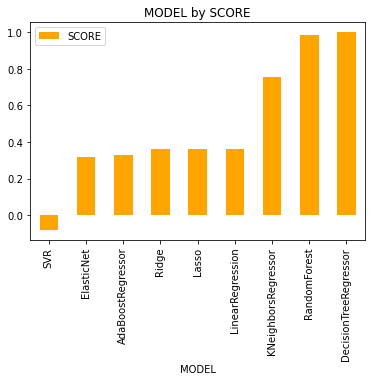

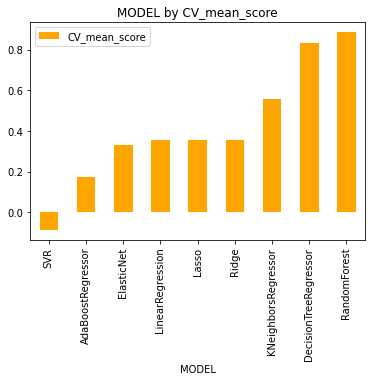

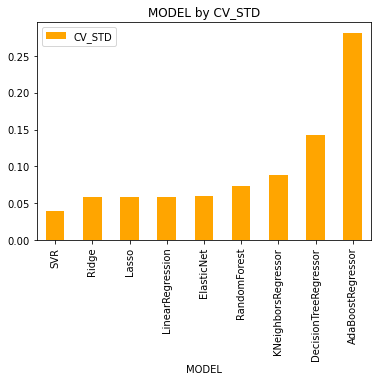

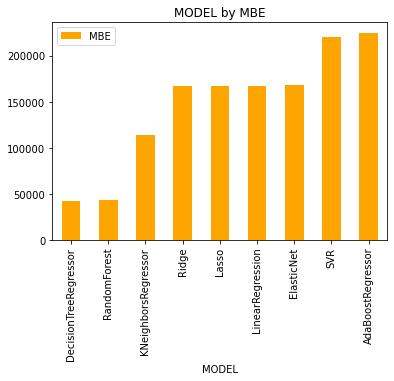

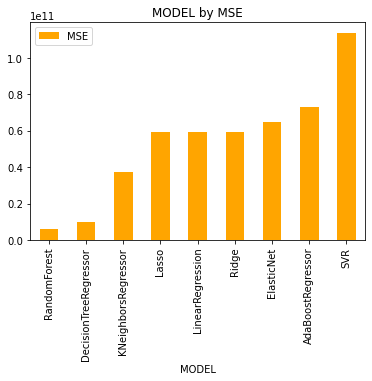

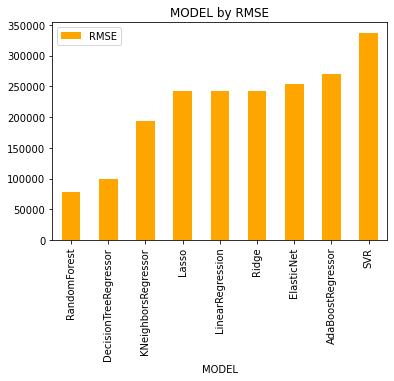

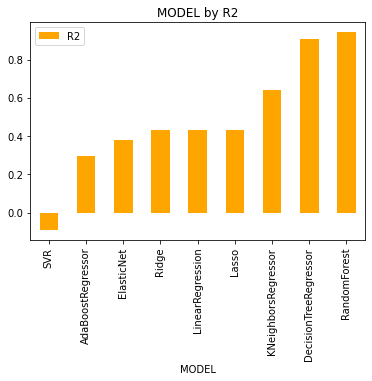

In [49]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = "orange")
    plt.title(f"MODEL by {metric}")
    plt.show()


In [51]:
rf = RandomForestRegressor(random_state=42)
cross_val_predict(rf, x_train, y_train, cv=5, n_jobs=-1).mean()

rf.fit(x_train, y_train)
RandomForestRegressor(random_state=42)






RandomForestRegressor(random_state=42)

In [52]:
predm=rf.predict(x_test)
predm

array([ 263895.02, 1035371.58,  409008.29, ...,  257055.54,  282553.01,
        322870.67])

In [53]:
rf.score(x_test,y_test), rf.score(x_train,y_train)

(0.9419475207728788, 0.9878671962787907)

In [54]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# Hyper Parameter Tuning.

In [ ]:
param_grid = [
    {"bootstrap": [True, False],
     "criterion": ["mse", "mae"],
     "n_estimators"      : [10,20,30,50,100],
     "max_features"      : ["auto", "sqrt", "log2"],
     "min_samples_split" : [2,4,8],
    }
]

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

In [ ]:
grid_search.best_estimator_

In [ ]:
reg_final_model = grid_search.best_estimator_

In [ ]:
reg_final_model.fit(x_train,y_train)

In [ ]:
grid_search.best_score_

In [ ]:
reg_final_model.score(x_train_1,y_train_1), reg_final_model.score(x_test_1,y_test_1)

# Saving the final model

In [ ]:
import joblib
joblib.dump(reg_final_model,"CARPRICE_PRED.obj")